<a href="https://colab.research.google.com/github/MarinaIMadh/Computer_Vision/blob/main/Exam/exam_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

<ipython-input-8-c161ce5c4b74>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(coins)
<ipython-input-8-c161ce5c4b74>:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


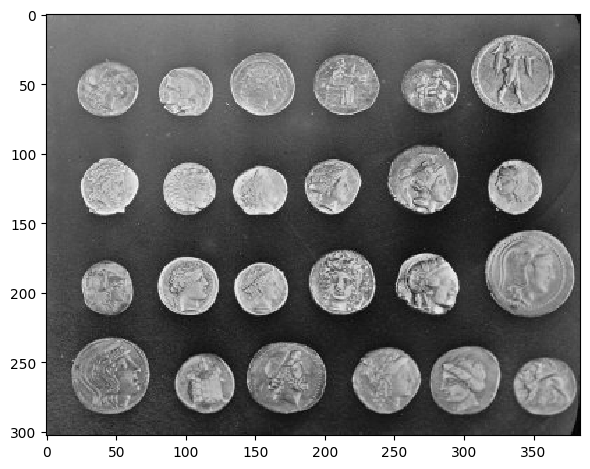

Grayscale pixel value range: 1 to 252


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage import data, img_as_uint
from skimage.util import random_noise
from skimage.filters import gaussian, prewitt
from skimage.data import binary_blobs
from skimage.morphology import erosion, disk
from skimage.color import rgb2gray
from scipy import ndimage
import math

coins = data.coins()
sk.io.imshow(coins)
sk.io.show()

coins.shape

min_value = np.min(coins)
max_value = np.max(coins)
print(f"Grayscale pixel value range: {min_value} to {max_value}")


2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

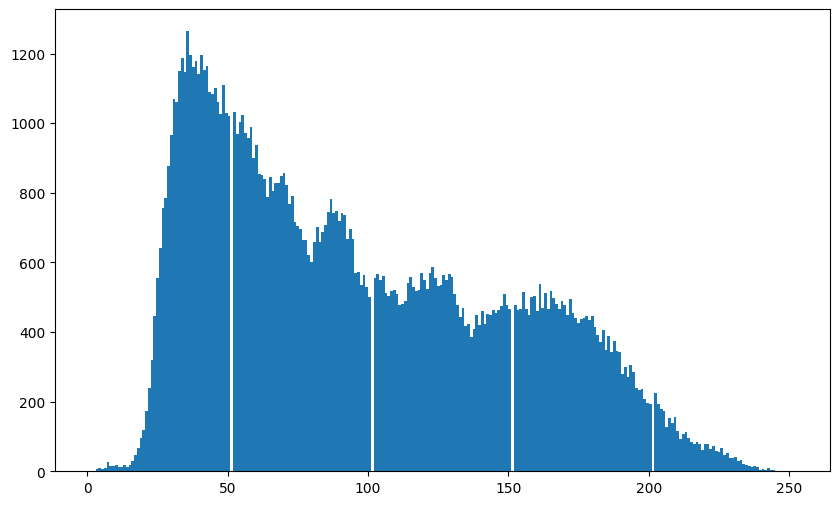

In [ ]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(coins)
np.max(IGB)
np.uint8(255)

import matplotlib.pyplot as plt
import numpy as np

v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(10, 6))
plt.hist(v, bins=256,density=False)
plt.show()

At the histogram, each peak  represents regions of the image that have similar brightness levels. In this image we have for:

Dark background region: a peak in the lower range of the histogram, between values 0-50. The background of the coins image is dark, so we see a significant number of pixels in this lower range.
Coin surfaces: The flat surfaces of the coins creates a fluctuations of values in the middle range of the histogram, between values 150-200. These are the brighter regions where light reflects directly off the coins.
Coin edges and shadows: These would appear as a middle peak or broader distribution between the background and bright coin surfaces, roughly in the 75-150 range. These represent transitional areas where the coins create shadows or where the curved edges of coins reflect light differently.

The histogram essentially shows us the "frequency" or count of pixels at each brightness level. We can understand the overall contrast distribution in the image.

3. Applied noise to the image and use the correct function to erase the noise.

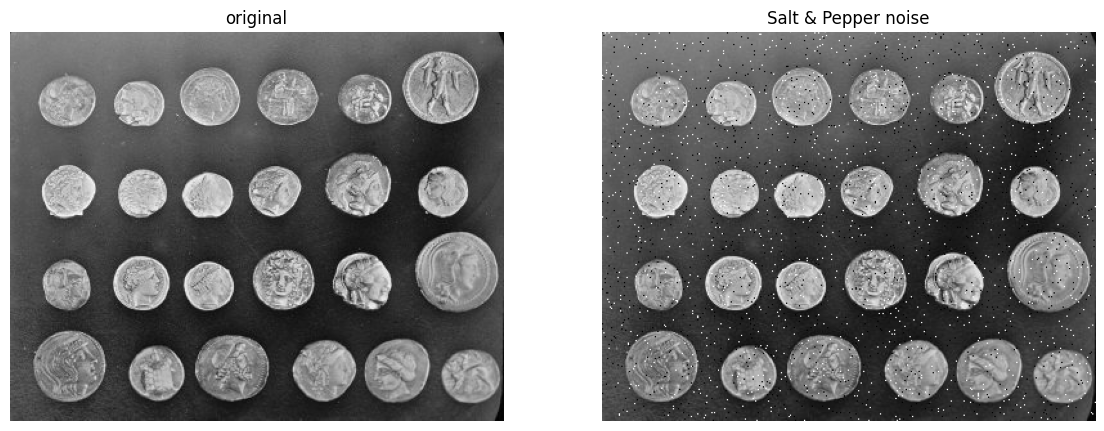

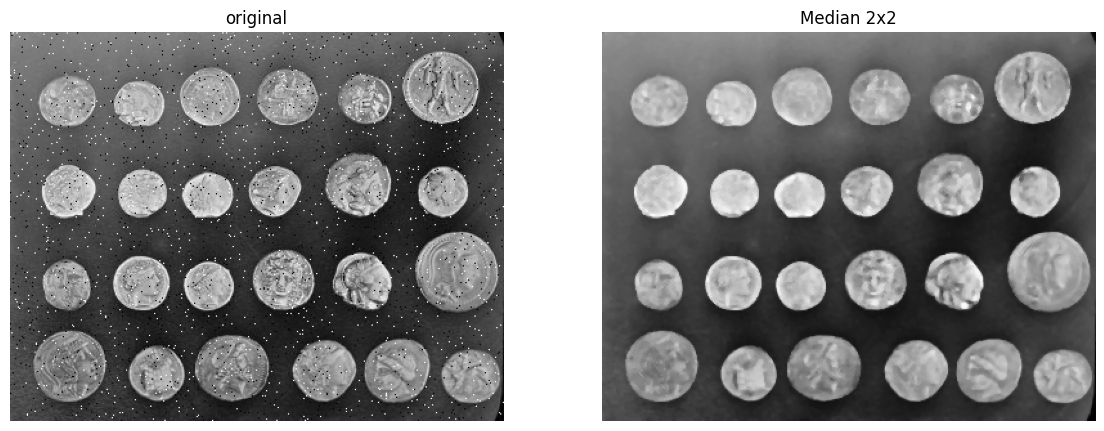

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

coins = data.coins()

noise = np.random.random(coins.shape)
noisy_image = img_as_ubyte(coins.copy())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(coins,noisy_image,'Salt & Pepper noise')

from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel2 = disk(2)
img_med2x2 = median(img, sel2)
plot_comparison(img,img_med2x2,'Median 2x2')
plt.savefig('median.png')


4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

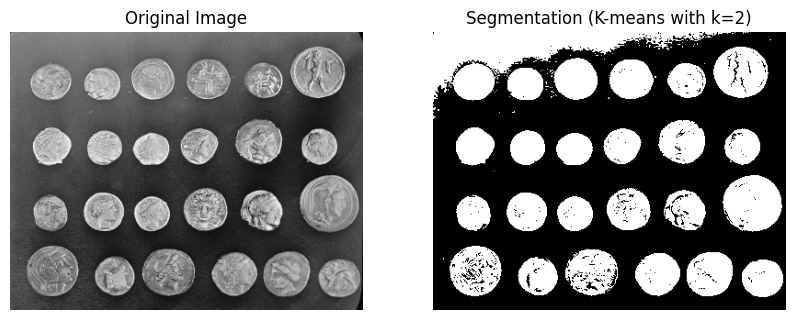

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

I = sk.data.coins()
v_I = np.reshape(I,(I.shape[0]*I.shape[1],1))

n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1]))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

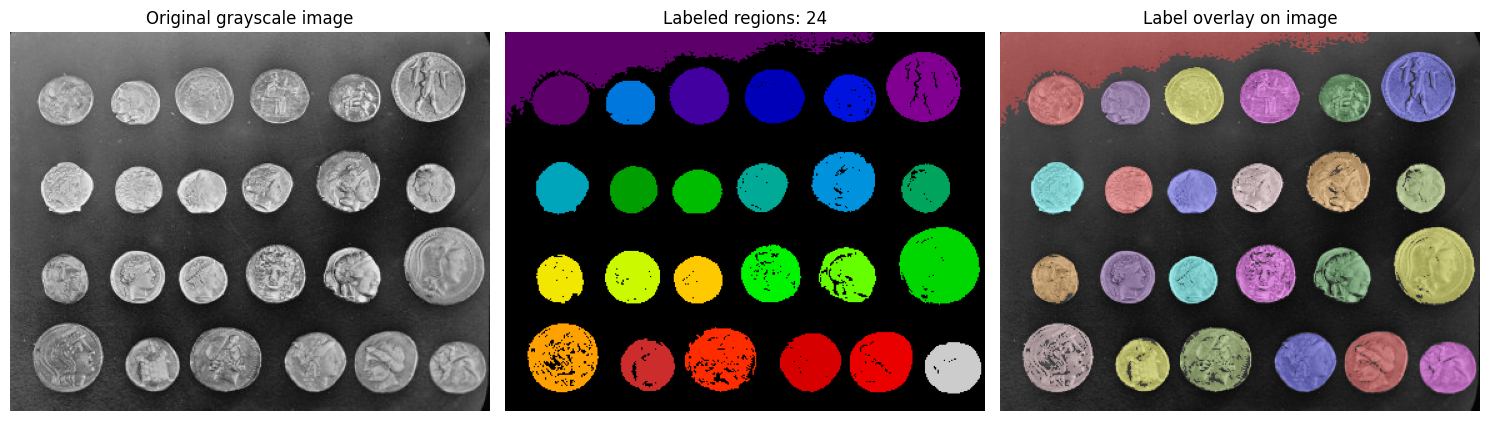

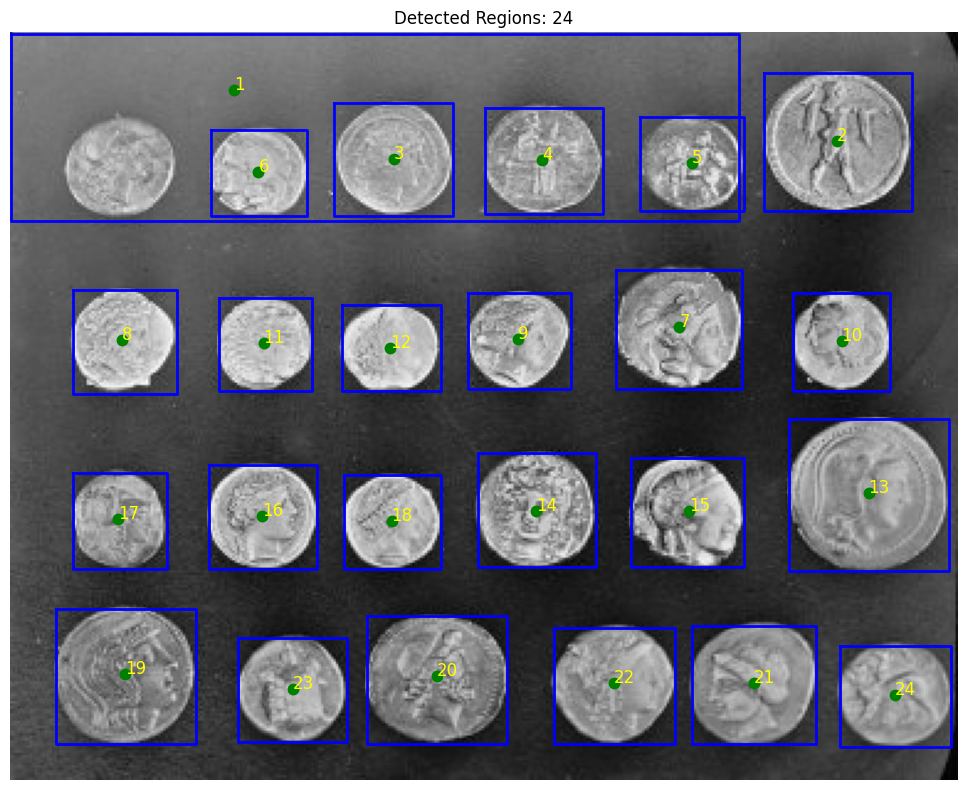

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, filters, measure, color, morphology
import numpy as np

I = data.coins()
thresh = filters.threshold_otsu(I)
bw = I > thresh

bw_clean = morphology.remove_small_objects(bw, min_size=100)

label_image = measure.label(bw_clean, connectivity=2)
image_label_overlay = color.label2rgb(label_image, image=I, bg_label=0)

props = measure.regionprops(label_image)
nregions = len(props)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(I, cmap='gray')
ax[0].set_title("Original grayscale image")
ax[1].imshow(label_image, cmap='nipy_spectral')
ax[1].set_title(f"Labeled regions: {nregions}")
ax[2].imshow(image_label_overlay)
ax[2].set_title("Label overlay on image")

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(I, cmap='gray')

for i, p in enumerate(props):
    y0, x0 = p.centroid
    ax.plot(x0, y0, '.g', markersize=15)
    minr, minc, maxr, maxc = p.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2)
    ax.text(x0, y0, str(i+1), color='yellow', fontsize=12)

ax.set_title(f'Detected Regions: {nregions}')
ax.axis('off')
plt.tight_layout()
plt.show()


6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

In [ ]:
from skimage.measure import regionprops
import numpy as np

props = regionprops(label_image)

for i, prop in enumerate(props):
    print(f"--- Region {i + 1} ---")
    print(f"Area: {prop.area} pixels")
    print(f"Major Axis Length: {prop.major_axis_length:.2f} pixels")
    print(f"Orientation: {np.degrees(prop.orientation):.2f} degrees\n")

    import matplotlib.pyplot as plt

# for i, prop in enumerate(props):
#     region_mask = (label_image == (i + 1))

#     fig, ax = plt.subplots(figsize=(4, 4))
#     ax.imshow(region_mask, cmap='gray')
#     ax.set_title(f'Region {i + 1}')
#     ax.axis('off')
#     plt.tight_layout()
#     plt.show()

--- Region 1 ---
Area: 8755.0 pixels
Major Axis Length: 291.29 pixels
Orientation: -81.55 degrees

--- Region 2 ---
Area: 2459.0 pixels
Major Axis Length: 59.97 pixels
Orientation: 88.95 degrees

--- Region 3 ---
Area: 1684.0 pixels
Major Axis Length: 47.40 pixels
Orientation: 76.24 degrees

--- Region 4 ---
Area: 1631.0 pixels
Major Axis Length: 47.61 pixels
Orientation: 89.42 degrees

--- Region 5 ---
Area: 1193.0 pixels
Major Axis Length: 41.31 pixels
Orientation: 79.27 degrees

--- Region 6 ---
Area: 1133.0 pixels
Major Axis Length: 39.98 pixels
Orientation: 82.90 degrees

--- Region 7 ---
Area: 1834.0 pixels
Major Axis Length: 51.41 pixels
Orientation: 87.78 degrees

--- Region 8 ---
Area: 1325.0 pixels
Major Axis Length: 42.45 pixels
Orientation: -50.61 degrees

--- Region 9 ---
Area: 1203.0 pixels
Major Axis Length: 40.92 pixels
Orientation: -59.27 degrees

--- Region 10 ---
Area: 1133.0 pixels
Major Axis Length: 39.72 pixels
Orientation: -50.04 degrees

--- Region 11 ---
Area: 

<Axes: xlabel='axis_major_length', ylabel='area'>

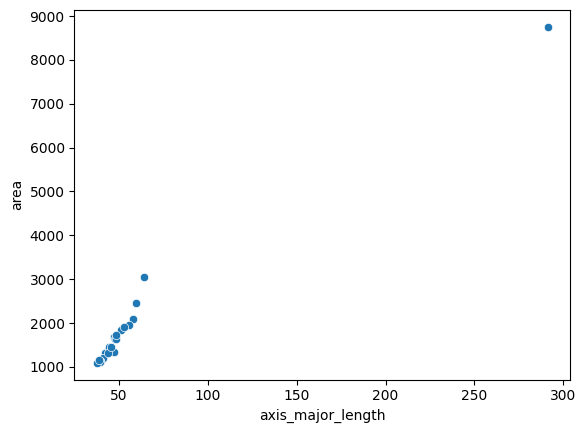

In [ ]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['area','axis_major_length', 'label'])

df_features = pd.DataFrame(props)
df_features.head()

import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [ ]:
df_large = df_features[df_features['area']>=1750]
N_large = df_large.shape[0]
print('there are {} coins with an area larger area than 1750'.format(N_large))

there are 7 coins with an area larger area than 1750


8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

labels of small blobs: [ 3  4  5  6  8  9 10 11 12 14 15 16 17 18 22 23 24]
labels of large blobs: [ 1  2  7 13 19 20 21]


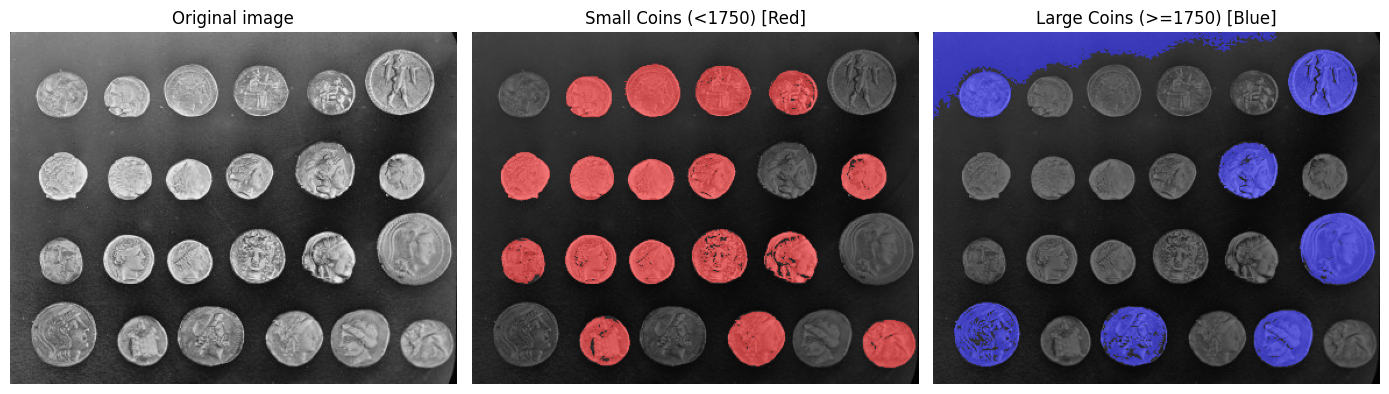

In [ ]:
df_small = df_features[df_features['area']<1750]
N_small = df_small.shape[0]

labels_small = df_small['label'].values
print('labels of small blobs: {}'.format(labels_small))
labels_large = df_large['label'].values
print('labels of large blobs: {}'.format(labels_large))

import numpy as np
mask_small = np.isin(label_image,labels_small)
mask_large = np.isin(label_image,labels_large)

red_mask = np.zeros((*coins.shape, 3), dtype=np.uint8)
blue_mask = np.zeros((*coins.shape, 3), dtype=np.uint8)

red_mask[mask_small] = [255, 0, 0]
blue_mask[mask_large] = [0, 0, 255]

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(coins,cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(coins, cmap='gray')
ax[1].imshow(red_mask, alpha=0.5)
ax[1].set_title("Small Coins (<1750) [Red]")

ax[2].imshow(coins, cmap='gray')
ax[2].imshow(blue_mask, alpha=0.5)
ax[2].set_title("Large Coins (>=1750) [Blue]")

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

9. Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

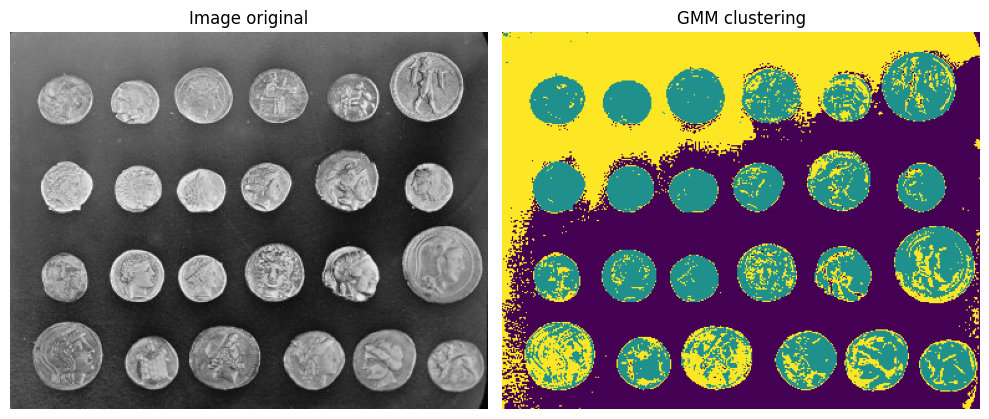

In [ ]:
import skimage as sk
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

coins = data.coins()

v_I = np.reshape(I,(coins.shape[0]*coins.shape[1],1))

gmm = mixture.GaussianMixture(n_components=3).fit(v_I)
v_gmm = gmm.fit_predict(v_I)
I_gmm = np.reshape(v_gmm,(coins.shape[0],coins.shape[1]))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(coins, cmap='gray')
ax0.set_title('Image original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

1. Preprocessing

Input Image: The first step is to load the image that you want to segment.
Convert to suitable color space (in this case we are working with an greyscale image). The image is reshaped into a 1D array (v_I) where each pixel is treated as a data point. This step is done so that each pixel’s intensity value can be clustered in a similar manner to any other data point.

2. Feature Extraction

Pixel Features: We can directly use the pixel values as features for clustering.

3. Clustering/ Fit the model

To compare I've used GMM unsupervised method

4. Predict the cluster labels

After fitting the method, the fit_predict() function assigns each pixel to one of the three clusters. Each pixel receives a cluster label indicating the Gaussian component it belongs to.

5. Reshape the predicted labels into the image shape:
The predicted cluster labels are reshaped back into the shape of the original image (coins.shape).

K-Means and GMM are both unsupervised clustering algorithms, but they differ in their assumptions and how they assign data points to clusters. K-Means uses this approach: assigns each data point strictly to the nearest cluster centroid based on Euclidean distance. It assumes that clusters are spherical, equally sized, and non-overlapping, which makes it simple efficient but often for real-world data where these assumptions don’t hold.

In contrast, GMM is a soft clustering algorithm that models the data as a mix of some Gaussian distributions. GMM calculates the probability of each point belonging to every cluster and assigns it based on the highest likelihood. This probabilistic nature allows GMM to model clusters with different shapes, sizes, and orientations, making it more flexible than K-Means. However, this added flexibility comes at the cost of increased computational complexity.

For the coin image, K-Means segments regions based purely on pixel intensity, assigning each pixel to one of the clusters based on its distance to cluster centroids. While this can separate the image into general light and dark regions, it struggles with subtle intensity variations and overlapping regions, especially when coins have shadows or varying contrast. GMM provides a more nuanced segmentation by modeling pixel intensities as a combination of Gaussian distributions. This results in a smoother and more accurate, especially when intensity variations within coins exist.

10. Extract the main texture features of this image

In [81]:
from skimage.feature.texture import graycomatrix, graycoprops

props = sk.measure.regionprops(label_image, intensity_image=coins)

nregions = len(props)
props_texture = np.zeros((nregions, 5))

for iregion, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = coins[minr:maxr, minc:maxc]

    if I.size == 0 or np.all(I == I[0, 0]):
        continue

    g = graycomatrix(I, [1], [0], levels=256, normed=True, symmetric=True)

    props_texture[iregion, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[iregion, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[iregion, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[iregion, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[iregion, 4] = graycoprops(g, 'correlation')[0, 0]

# Create DataFrame and export to Excel
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df.to_excel("Texture_features.xlsx", index=False)
df

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,247.638113,7.512531,0.311544,0.033891,0.892879
1,995.526634,21.321429,0.086937,0.017297,0.765693
2,539.774746,14.253932,0.115871,0.023480,0.806299
3,577.133102,16.666007,0.083029,0.020208,0.784722
4,1028.797176,21.617458,0.076587,0.021379,0.736437
5,561.821053,15.009023,0.099207,0.026133,0.800590
6,891.572083,19.571250,0.075520,0.018196,0.845380
7,784.764808,17.322300,0.097732,0.022090,0.857712
8,1067.844278,20.778612,0.072951,0.021424,0.832012
9,948.079605,18.903289,0.085836,0.023050,0.873162



Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)


The course was very insightful even though I would have preferred that it would last longer, at least 2-3 months we could learn more and in a pace we could work more exercises when we were live. Even though it was a short duration I really appreciate all the materials you've sent and all the experiences you have shared with us. Is always really nice to learn from people that are adequate in a certain field and are passionate about it.